# EXTRACCIÓN DE CARACTERÍSTICAS EEG

In [22]:
# biosignalsnotebooks python package
!pip install biosignalsnotebooks
!pip install EMD-signal
import biosignalsnotebooks as bsnb

# Scientific packages
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax,genfromtxt
from scipy.integrate import cumtrapz
from scipy.signal import welch

import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EEMD
import pywt

## REPOSO

In [23]:
# Load of data
data, header = bsnb.load("EMG_Reposo.txt", get_header=True)
channel = list(data.keys())[0]
device = header["device"]
resolution = int(header["resolution"][0])
resolution=10
# Sampling frequency and acquired data
fs = header["sampling rate"]
# Signal Samples
vals = bsnb.raw_to_phy("EMG", device, data[channel], resolution, option="mV") # Conversion to mV
time = linspace(0, len(vals) / fs, len(vals))



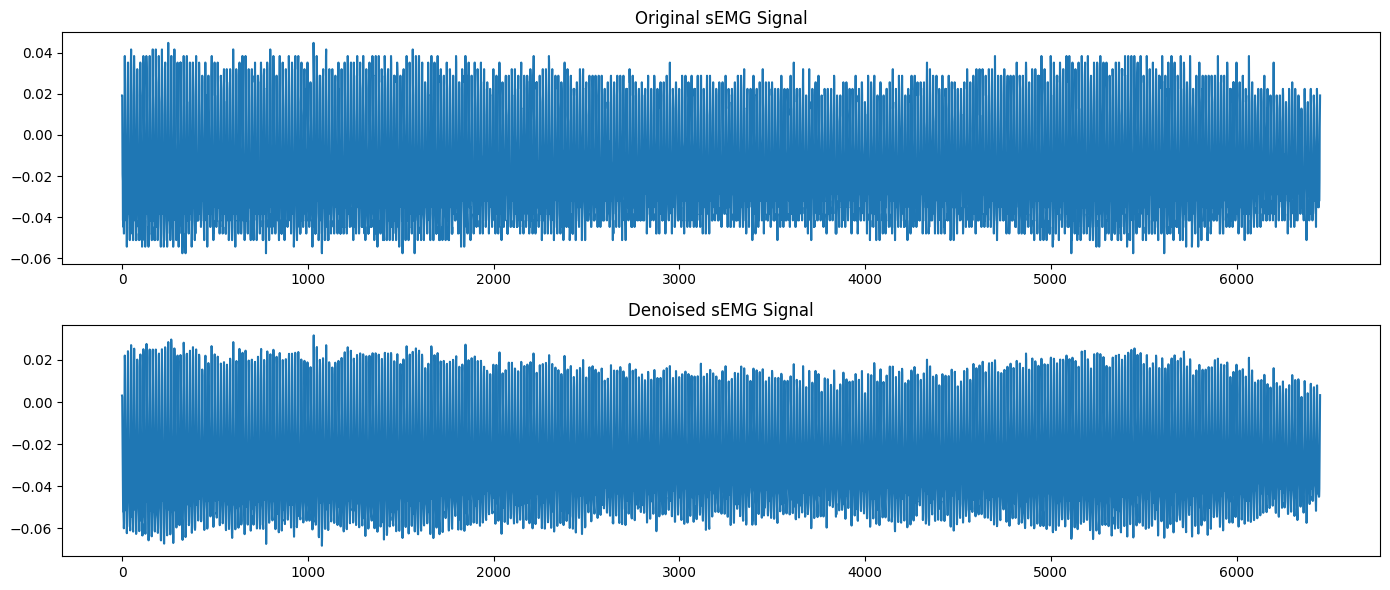

In [24]:
#FILTRADO
# Step 1: Decompose the noised sEMG signal using the EEMD method and obtain n IMFs
eemd = EEMD()
IMFs = eemd.eemd(vals)

# Step 2: Calculate the autocorrelation function of each IMF and their normalization results
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

normalized_autocorr = [autocorr(imf) / np.max(autocorr(imf)) for imf in IMFs]

# Step 3: Calculate the variance of each normalized autocorrelation function to measure the noise component of each IMF
variances = [np.var(ac) for ac in normalized_autocorr]

# Step 4: Find the boundary IMF (ct) through the variance
threshold = np.mean(variances)  # You may need to adjust this threshold based on your data
high_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] < threshold]
low_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] >= threshold]

# Step 5: Process ct using wavelet extraction and process the remaining high-frequency IMFs using an improved wavelet threshold denoising method
def wavelet_denoise(imf, wavelet='sym8', level=3):
    coeff = pywt.wavedec(imf, wavelet, mode='per')
    sigma = np.median(np.abs(coeff[-level])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(imf)))
    coeff = list(map(lambda x: pywt.threshold(x, value=uthresh, mode='soft'), coeff))
    return pywt.waverec(coeff, wavelet, mode='per')

denoised_IMFs = [wavelet_denoise(imf) for imf in high_noise_IMFs] + low_noise_IMFs

# Step 6: Reconstruct the original signal
reconstructed_signal = np.sum(denoised_IMFs, axis=0)

# Plot original and denoised signals
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(vals)
plt.title('Original sEMG Signal')
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Denoised sEMG Signal')
plt.tight_layout()
plt.show()


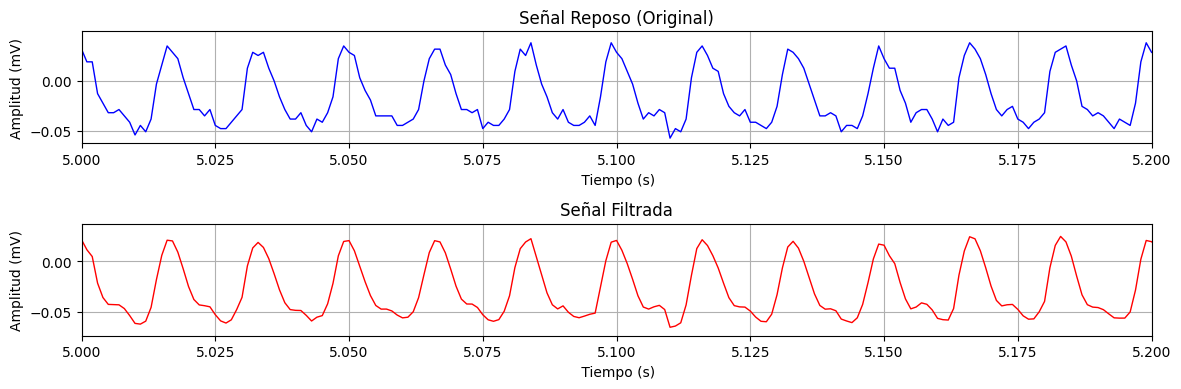

In [25]:
#Debido a que la señal comienza en 4 segundos aproximadamente, se corta la señal en ese punto
Fs=1000#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
time = np.arange(0,len(vals))/Fs


# The commented values are for Reposo, Oposición and Tensión for each column respectively
start_time= 5 #5 #12 #5
plotting_window = 0.2 #0.2 #1 #1

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(time, vals, lw=1, color='blue')
# plt.xlabel('Tiempo (s)')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Reposo (Original)')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)


plt.subplot(2, 1, 2)
plt.plot(time, reconstructed_signal, lw=1, color='red')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Filtrada')
plt.grid(True)

plt.xlim(start_time, start_time + plotting_window)
plt.tight_layout()
plt.savefig("SeñalReposo.png")
plt.show()


In [26]:
burst_begin, burst_end = bsnb.detect_emg_activations(vals, fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]


In [27]:
bsnb.emg_parameters(vals, fs, raw_to_mv=False)

{'Number of Muscular Activations': 1,
 'Maximum Muscular Activation Duration': 6.0499379748798265,
 'Minimum Muscular Activation Duration': 6.0499379748798265,
 'Average Muscular Activation Duration': 6.0499379748798265,
 'Standard Deviation of Muscular Activation Duration': 0.0,
 'Maximum Sample Value': 0.044714754707631366,
 'Minimum Sample Value': -0.057490398909811787,
 'Average Sample Value': -0.016568227882199745,
 'Standard Deviation Sample Value': 0.02642526322805102,
 'RMS': 0.031189753314643038,
 'Area': -106.88423330648733,
 'Total Power Spect': 0.0007000399299170216,
 'Median Frequency': 62.5,
 'Maximum Power Frequency': 58.59375}

## TENSIÓN

In [28]:
# Load of data
data, header = bsnb.load("EMG_Tension.txt", get_header=True)
channel = list(data.keys())[0]
device = header["device"]
resolution = int(header["resolution"][0])
resolution=10
# Sampling frequency and acquired data
fs = header["sampling rate"]
# Signal Samples
vals = bsnb.raw_to_phy("EMG", device, data[channel], resolution, option="mV") # Conversion to mV
time = linspace(0, len(vals) / fs, len(vals))

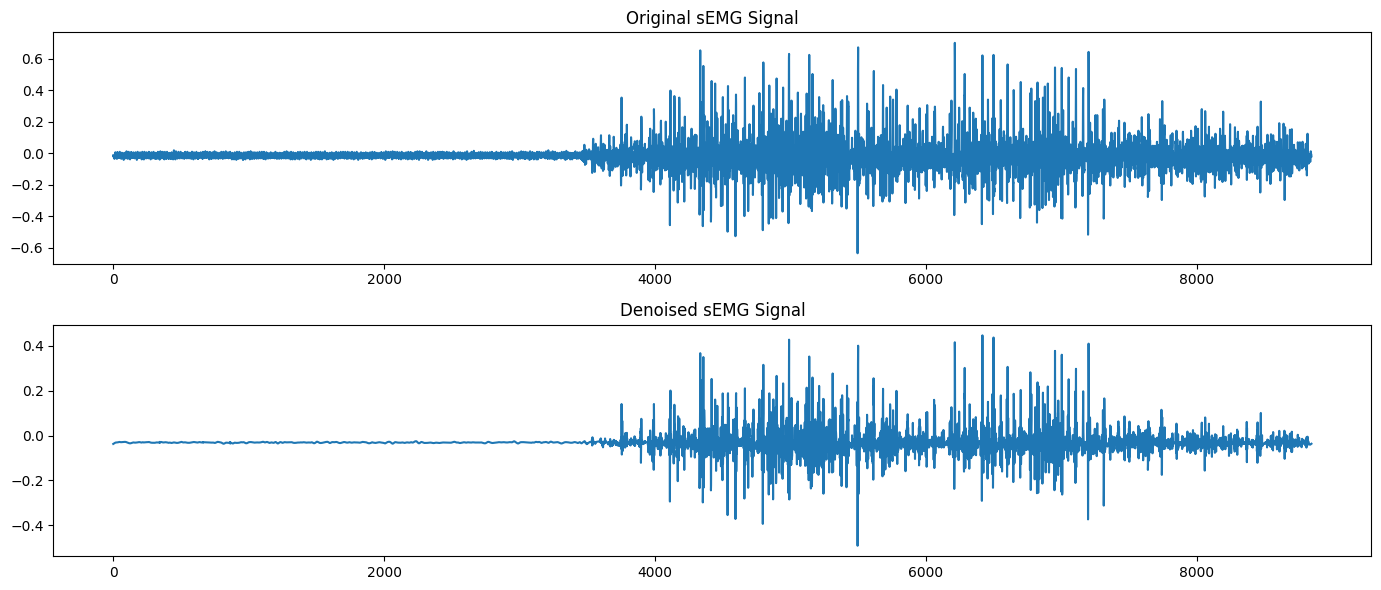

In [29]:
# Step 1: Decompose the noised sEMG signal using the EEMD method and obtain n IMFs
eemd = EEMD()
IMFs = eemd.eemd(vals)

# Step 2: Calculate the autocorrelation function of each IMF and their normalization results
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

normalized_autocorr = [autocorr(imf) / np.max(autocorr(imf)) for imf in IMFs]

# Step 3: Calculate the variance of each normalized autocorrelation function to measure the noise component of each IMF
variances = [np.var(ac) for ac in normalized_autocorr]

# Step 4: Find the boundary IMF (ct) through the variance
threshold = np.mean(variances)  # You may need to adjust this threshold based on your data
high_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] < threshold]
low_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] >= threshold]

# Step 5: Process ct using wavelet extraction and process the remaining high-frequency IMFs using an improved wavelet threshold denoising method
def wavelet_denoise(imf, wavelet='sym8', level=3):
    coeff = pywt.wavedec(imf, wavelet, mode='per')
    sigma = np.median(np.abs(coeff[-level])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(imf)))
    coeff = list(map(lambda x: pywt.threshold(x, value=uthresh, mode='soft'), coeff))
    return pywt.waverec(coeff, wavelet, mode='per')

denoised_IMFs = [wavelet_denoise(imf) for imf in high_noise_IMFs] + low_noise_IMFs

# Step 6: Reconstruct the original signal
reconstructed_signal = np.sum(denoised_IMFs, axis=0)

# Plot original and denoised signals
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(vals)
plt.title('Original sEMG Signal')
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Denoised sEMG Signal')
plt.tight_layout()
plt.show()


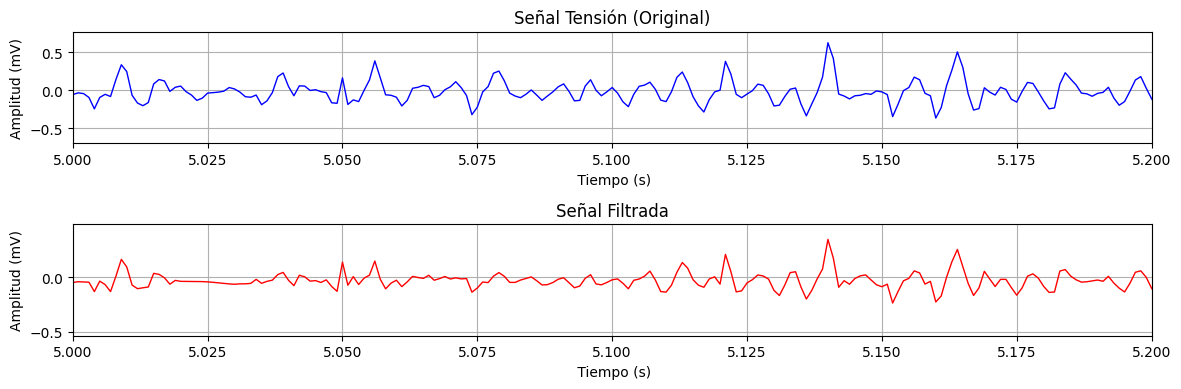

In [30]:
#Debido a que la señal comienza en 4 segundos aproximadamente, se corta la señal en ese punto
Fs=1000#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
time = np.arange(0,len(vals))/Fs


# The commented values are for Reposo, Oposición and Tensión for each column respectively
start_time= 5 #5 #12 #5
plotting_window = 0.2 #0.2 #1 #1

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(time, vals, lw=1, color='blue')
# plt.xlabel('Tiempo (s)')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Tensión (Original)')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)


plt.subplot(2, 1, 2)
plt.plot(time, reconstructed_signal, lw=1, color='red')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Filtrada')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)
plt.tight_layout()
plt.savefig("SeñalTensión.png")
plt.show()

In [31]:
burst_begin, burst_end = bsnb.detect_emg_activations(vals, fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]


In [32]:
bsnb.emg_parameters(vals, fs, raw_to_mv=False)

{'Number of Muscular Activations': 1,
 'Maximum Muscular Activation Duration': 4.917555656006327,
 'Minimum Muscular Activation Duration': 4.917555656006327,
 'Average Muscular Activation Duration': 4.917555656006327,
 'Standard Deviation of Muscular Activation Duration': 0.0,
 'Maximum Sample Value': 0.7026604311199208,
 'Minimum Sample Value': -0.6355882990584738,
 'Average Sample Value': -0.016024050232231954,
 'Standard Deviation Sample Value': 0.0909902158935363,
 'RMS': 0.09239041927709515,
 'Area': -141.79687499999793,
 'Total Power Spect': 0.008355839629936957,
 'Median Frequency': 125.0,
 'Maximum Power Frequency': 109.375}

## OPOSICIÓN

In [33]:
# Load of data
data, header = bsnb.load("EMG_Oposición.txt", get_header=True)
channel = list(data.keys())[0]
device = header["device"]
resolution = int(header["resolution"][0])
resolution=10
# Sampling frequency and acquired data
fs = header["sampling rate"]
# Signal Samples
vals = bsnb.raw_to_phy("EMG", device, data[channel], resolution, option="mV") # Conversion to mV
time = linspace(0, len(vals) / fs, len(vals))


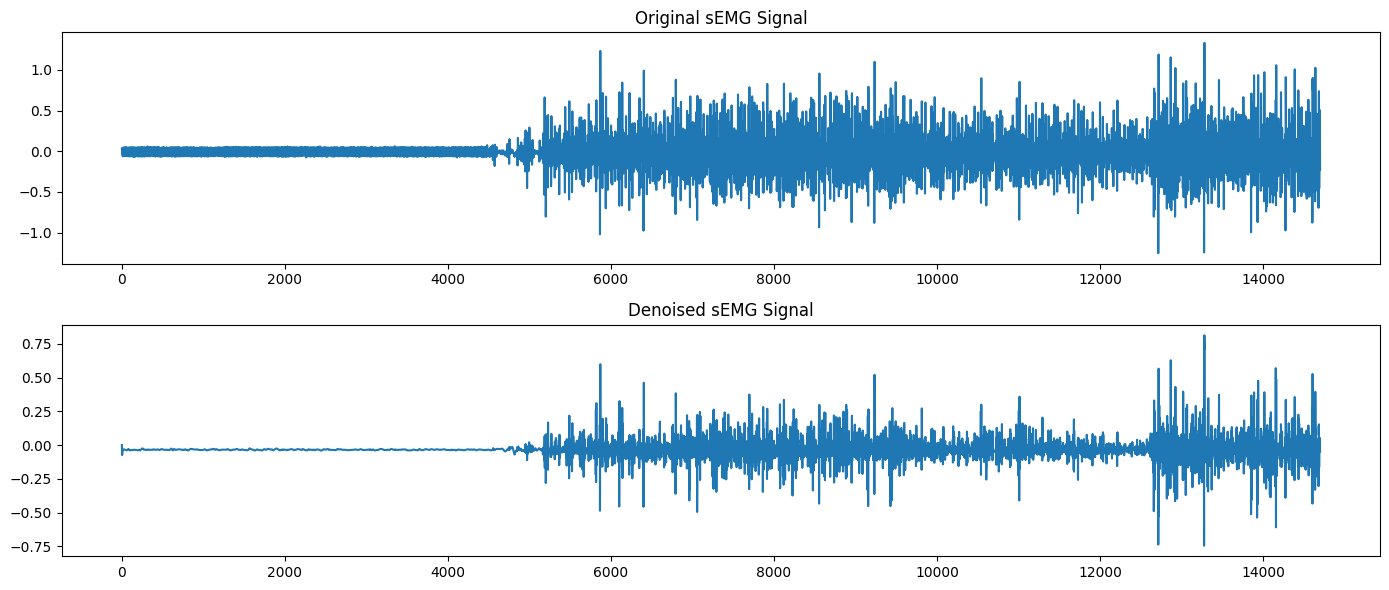

In [34]:
# Step 1: Decompose the noised sEMG signal using the EEMD method and obtain n IMFs
eemd = EEMD()
IMFs = eemd.eemd(vals)

# Step 2: Calculate the autocorrelation function of each IMF and their normalization results
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

normalized_autocorr = [autocorr(imf) / np.max(autocorr(imf)) for imf in IMFs]

# Step 3: Calculate the variance of each normalized autocorrelation function to measure the noise component of each IMF
variances = [np.var(ac) for ac in normalized_autocorr]

# Step 4: Find the boundary IMF (ct) through the variance
threshold = np.mean(variances)  # You may need to adjust this threshold based on your data
high_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] < threshold]
low_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] >= threshold]

# Step 5: Process ct using wavelet extraction and process the remaining high-frequency IMFs using an improved wavelet threshold denoising method
def wavelet_denoise(imf, wavelet='sym8', level=3):
    coeff = pywt.wavedec(imf, wavelet, mode='per')
    sigma = np.median(np.abs(coeff[-level])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(imf)))
    coeff = list(map(lambda x: pywt.threshold(x, value=uthresh, mode='soft'), coeff))
    return pywt.waverec(coeff, wavelet, mode='per')

denoised_IMFs = [wavelet_denoise(imf) for imf in high_noise_IMFs] + low_noise_IMFs

# Step 6: Reconstruct the original signal
reconstructed_signal = np.sum(denoised_IMFs, axis=0)

# Plot original and denoised signals
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(vals)
plt.title('Original sEMG Signal')
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Denoised sEMG Signal')
plt.tight_layout()
plt.show()


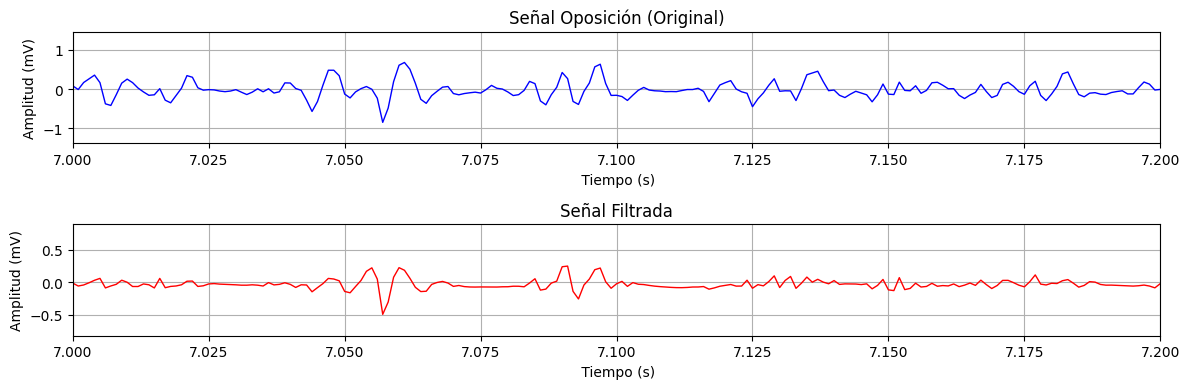

In [35]:
#Debido a que la señal comienza en 4 segundos aproximadamente, se corta la señal en ese punto
Fs=1000#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
time = np.arange(0,len(vals))/Fs


# The commented values are for Reposo, Oposición and Tensión for each column respectively
start_time= 7
plotting_window = 0.2 #0.2 #1 #1

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(time, vals, lw=1, color='blue')
# plt.xlabel('Tiempo (s)')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Oposición (Original)')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)


plt.subplot(2, 1, 2)
plt.plot(time, reconstructed_signal, lw=1, color='red')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Filtrada')
plt.grid(True)
# plt.savefig("SeñalReposo.png")
plt.xlim(start_time, start_time + plotting_window)
plt.tight_layout()
plt.savefig("SeñalOposición.png")
plt.show()

In [36]:
burst_begin, burst_end = bsnb.detect_emg_activations(vals, fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

In [37]:
bsnb.emg_parameters(vals, fs, raw_to_mv=False)


{'Number of Muscular Activations': 1,
 'Maximum Muscular Activation Duration': 9.453643104973128,
 'Minimum Muscular Activation Duration': 9.453643104973128,
 'Average Muscular Activation Duration': 9.453643104973128,
 'Standard Deviation of Muscular Activation Duration': 0.0,
 'Maximum Sample Value': 1.3318609080773043,
 'Minimum Sample Value': -1.255207042864222,
 'Average Sample Value': -0.01649122739098117,
 'Standard Deviation Sample Value': 0.18601376405757442,
 'RMS': 0.18674335597211486,
 'Area': -242.3236283603801,
 'Total Power Spect': 0.033161401354944164,
 'Median Frequency': 117.1875,
 'Maximum Power Frequency': 113.28125}